# XGB

In [2]:
import xgboost as xgb
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from random import sample
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, r2_score, roc_auc_score, roc_curve, cohen_kappa_score, brier_score_loss
from sklearn.metrics import matthews_corrcoef

In [3]:
#input of train data
data = pd.read_csv("trainset_2168.csv")

In [4]:
df = pd.DataFrame(data)
df.reset_index(drop=True, inplace=True)
df

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d,Target
0,-2.728889,-25.325082,14.790515,0.805420,3.984015,-6.612719,398.502575,0.125251,-545.754350,-4.559571,...,0.042195,0.579042,159.995844,28.773333,0.119289,12.574040,-6.861521,-499.031111,3.008889,0
1,-0.013172,-9.509606,0.000000,1.188261,10.457433,0.836143,-244.755691,0.056368,286.027058,-4.072640,...,-0.070246,1.164533,153.088486,6.491990,-0.059652,-3.837482,-8.393922,-92.979708,-7.561410,0
2,-8.746667,19.078029,11.050456,0.943259,5.410910,-2.265468,-543.310893,0.095132,-222.679922,-2.797881,...,0.193372,0.767330,155.950676,7.115556,-0.036548,-13.213895,-7.304433,-204.328889,3.671111,0
3,-7.500000,7.298561,0.000000,1.064240,-1.142632,-2.915553,-899.923918,0.142939,-523.700577,-4.546686,...,0.056348,0.951546,155.401583,7.629378,-0.003948,-23.880483,-17.782129,44.177627,-13.250000,0
4,0.979994,-54.298523,0.000000,0.999246,4.309280,-3.544286,-823.626996,0.053800,-493.778160,-4.851646,...,0.056962,0.963492,148.280834,6.573099,0.093608,-14.915751,-7.269271,-34.333333,2.309326,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,-2.785000,-2.962981,5.316789,1.053967,6.411154,-1.169308,-370.566598,0.156703,-331.812834,-1.586460,...,0.104734,0.739404,152.740651,7.700000,-0.248710,1.145958,-3.199700,-63.000000,2.282500,1
2164,-2.207908,-18.038352,0.000000,0.815257,9.328611,2.336778,-490.408818,0.084582,295.652771,-2.133108,...,0.079423,0.916667,158.894061,6.959184,0.277052,-7.050913,-9.365004,-8.285714,0.232143,1
2165,1.102273,-28.881507,5.316789,0.908729,6.506799,-2.353837,-1289.670230,0.152006,-997.066785,-2.253884,...,0.115811,0.909485,153.576879,10.671488,0.044511,-17.510129,-17.513844,123.568182,-2.732955,1
2166,-11.248959,-22.799880,10.633577,1.093079,9.120382,-2.371401,-1110.406849,0.195666,-338.916459,-3.060512,...,0.073244,0.668509,157.460655,10.330887,-0.081357,-3.845589,-16.116821,-25.806784,-7.429875,1


In [5]:
y= df.Target
X=df.drop('Target', axis=1)

In [6]:
cat_features=list(range(0,X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [7]:
df.Target.value_counts()

Target
1    1718
0     450
Name: count, dtype: int64

In [8]:
y_train = df.Target
x_train = df.drop('Target', axis=1)

In [23]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T

In [10]:
y_train.value_counts()

Target
1    1718
0     450
Name: count, dtype: int64

In [16]:
import xgboost as xgb
xgb = xgb.XGBClassifier(
    colsample_bylevel= 0.6,
    colsample_bytree= 0.9,
    learning_rate= 0.1,
    max_delta_step= 1,
    max_depth= 10,
    n_estimators= 1000,
    objective= 'binary:logistic',
    subsample= 0.1
)
xgb.fit(x_train.T, y_train.T)
acc_train=xgb.score(x_train.T,y_train.T)*100
print(acc_train)

97.32472324723247


<Figure size 4200x3000 with 0 Axes>

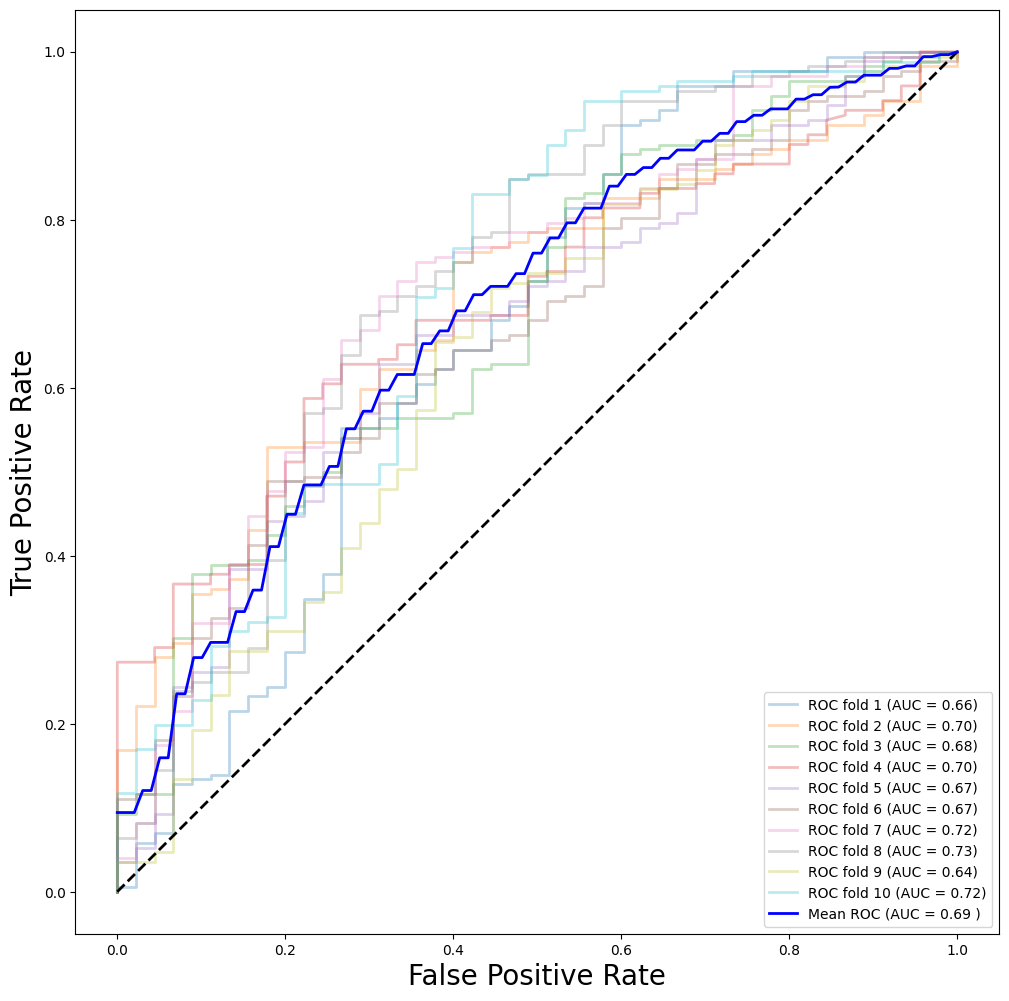

In [24]:
# plot k fold ROC

from sklearn.metrics import RocCurveDisplay

from numpy import interp
from sklearn.metrics import roc_curve,auc
cv = StratifiedKFold(n_splits=10,shuffle=False)

plt.figure(figsize=(7, 5), dpi=600)
fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x_train,y_train):
    prediction = xgb.fit(x_train.iloc[train],y_train.iloc[train]).predict_proba(x_train.iloc[test])
    fpr, tpr, t = roc_curve(y_train.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.legend(loc="lower right")
plt.savefig('XGB-AUC.png', dpi=600, bbox_inches='tight')
plt.show()

In [25]:
from sklearn.model_selection import StratifiedKFold

# Perform k-fold cross-validation
k_folds = 10  # Number of folds
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)  # StratifiedKFold for classification
accuracy_scores = []  # To store accuracy scores of each fold

for fold, (train_index, val_index) in enumerate(skf.split(x_train, y_train), 1):
    print(f"Fold {fold}/{k_folds}")
    X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the model on this fold
    xgb.fit(X_train_fold, y_train_fold)
    
    # Calculate accuracy on validation data
    accuracy = xgb.score(X_val_fold, y_val_fold)
    accuracy_scores.append(accuracy)
    print(f"Validation Accuracy: {accuracy}")

# Print average accuracy across all folds
print(f"Average Validation Accuracy: {np.mean(accuracy_scores)}")


Fold 1/10
Validation Accuracy: 0.7926267281105991
Fold 2/10
Validation Accuracy: 0.7972350230414746
Fold 3/10
Validation Accuracy: 0.7695852534562212
Fold 4/10
Validation Accuracy: 0.7972350230414746
Fold 5/10
Validation Accuracy: 0.7741935483870968
Fold 6/10
Validation Accuracy: 0.7695852534562212
Fold 7/10
Validation Accuracy: 0.8064516129032258
Fold 8/10
Validation Accuracy: 0.7926267281105991
Fold 9/10
Validation Accuracy: 0.8194444444444444
Fold 10/10
Validation Accuracy: 0.8148148148148148
Average Validation Accuracy: 0.7933798429766172


# Test Set

In [26]:
#Read the validation Test set
v_test_data = pd.read_csv("testset_480.csv")
v_test_data = pd.DataFrame(v_test_data)
v_test_data.shape

(480, 61)

In [27]:
Y_v_test_data = v_test_data.Target
X_v_test_data = v_test_data.drop('Target', axis=1)
X_v_test_data

,ATSC5d,ATSC4i,SlogP_VSA1,GATS2v,VSA_EState6,ATSC5p,ATSC3v,AATSC0are,ATSC5v,FilterItLogS,...,VSA_EState3.1,MATS2Z,GATS2m,AATS2i,AATSC0Z,MATS2i,ATSC3i,VSA_EState6.1,ATSC7Z,ATSC7d
0,1.693028,1.260847,10.053652,0.904036,6.026203,-1.137217,-837.853718,0.149903,-625.520865,-3.150915,...,-0.473182,0.119106,0.834557,156.775477,7.704475,0.140815,-12.544560,-3.699413,97.098855,-1.078044
1,-0.160000,-16.959768,5.316789,0.855497,9.042863,-3.350736,154.068480,0.129078,-954.533845,-2.811453,...,-0.600531,0.177572,0.720924,156.266297,7.448889,0.203932,-7.079175,-7.764219,34.617778,4.560000
2,-3.520661,14.955763,11.467335,0.655746,0.000000,-0.711308,-570.997585,0.127517,-208.212718,-0.074724,...,2.624306,0.130178,0.371037,179.497191,15.363636,0.763846,-22.972316,0.000000,216.000000,1.785124
3,-3.000000,-8.378997,5.316789,0.827198,-0.641181,-1.276164,120.990147,0.175345,-716.948087,-2.008475,...,-0.929653,0.281046,0.618603,161.479576,8.096939,0.329182,-31.375253,-2.145085,69.244898,6.000000
4,-3.947831,54.171370,5.316789,0.786149,8.465976,-3.188141,-2552.696930,0.147952,-712.434840,-0.404882,...,2.829711,-0.067660,1.017049,168.668013,7.754132,0.664913,-87.783953,-4.341668,-9.291322,0.089360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,-8.214158,0.922341,0.000000,0.959130,21.600003,-2.099758,-86.361631,0.034490,-376.777573,-4.670166,...,0.000000,-0.045444,1.057126,150.945902,6.395003,0.099263,10.019733,-10.697498,-95.060083,-8.015467
476,-6.294925,4.179811,0.000000,0.986466,27.876571,-2.530523,-383.555384,0.056951,-456.530390,-5.347444,...,2.726381,-0.049150,1.028872,154.187765,6.666667,-0.091731,23.001045,-20.177253,-44.777778,-1.182442
477,-24.951848,70.058608,18.823487,0.768811,10.922453,4.908046,-565.670145,0.215391,-272.171019,-8.418947,...,38.500958,0.041996,0.766511,156.369113,12.292740,0.020256,-70.848983,-23.329686,-1006.311044,-42.679189
478,-16.111111,-14.371710,0.000000,0.833433,17.876888,-3.651264,-363.135198,0.034875,-717.608423,-5.059764,...,0.000000,0.014342,0.963092,149.643793,6.395792,0.257719,-5.076872,-8.343076,-82.262327,1.333333


In [28]:
v_predictions = xgb.predict(X_v_test_data)
v_acc_test = xgb.score(X_v_test_data, Y_v_test_data)*100
print(v_acc_test)

82.08333333333333


In [29]:
# performance metrics to calculate
from sklearn.metrics import matthews_corrcoef
print('Accuracy:%0.3f'% v_acc_test)
tn, fp, fn, tp = confusion_matrix(Y_v_test_data, v_predictions).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('Sensitivity:%0.3f'% sensitivity)
print('Specificity:%0.3f'% specificity)
ba = 0.5 * (sensitivity + specificity)
print('Balance accuracy:%0.3f'% ba)
mcc = matthews_corrcoef(Y_v_test_data, v_predictions)
print('MCC: %0.3f'% mcc)
r_auc_score = roc_auc_score(Y_v_test_data, v_predictions)
print('AUC: %0.3f' % r_auc_score)
bloss = brier_score_loss(Y_v_test_data, v_predictions)
print('Brier_loss: %0.3f' % bloss)
FPR = fp/(fp+tn)
FNR = fn/(tp+fn)
Precision = tp/(tp+fp)
Recall = tp/(tp+fn)
print('False Postive rate: %0.3f' %FPR)
print('False Negative rate: %0.3f' %FNR)
print('Precision: %0.3f' %Precision)
print('Recall: %0.3f' %Recall)
f1=2*((Precision*Recall)/(Precision+Recall))
print('F1: %0.3f' %f1)
kappa = cohen_kappa_score(Y_v_test_data, v_predictions)
print('Kappa: %0.3f' %kappa)

Accuracy:82.083
Sensitivity:0.897
Specificity:0.438
Balance accuracy:0.667
MCC: 0.342
AUC: 0.667
Brier_loss: 0.179
False Postive rate: 0.562
False Negative rate: 0.102
Precision: 0.889
Recall: 0.897
F1: 0.893
Kappa: 0.342


In [30]:
# confusion matrix
cf =(confusion_matrix(Y_v_test_data, v_predictions))
print(classification_report(Y_v_test_data, v_predictions))

              precision    recall  f1-score   support

           0       0.46      0.44      0.45        80
           1       0.89      0.90      0.89       400

    accuracy                           0.82       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.82      0.82      0.82       480



<Axes: xlabel='Predicted Value', ylabel='True Value'>

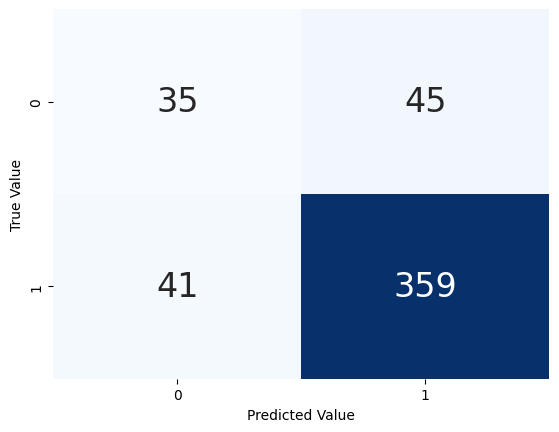

In [31]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "Predicted Value", ylabel ="True Value")
cf_plt

In [32]:
fig = cf_plt.get_figure()
fig.savefig("XGB_Con_mat.png")

In [33]:
m2= xgb.predict_proba(X_v_test_data)
m2 = pd.DataFrame(m2)
m2.to_csv("XGB_Probabs.csv")

In [34]:
m2_probs = xgb.predict_proba(X_v_test_data)

# Convert probabilities to binary predictions
m2_binary = (m2_probs[:, 1] > 0.5).astype(int)

# Create a DataFrame with binary predictions
m2_binary_df = pd.DataFrame(m2_binary, columns=['Predicted_Class'])

# Save to CSV
m2_binary_df.to_csv("XGB_Probabs_Binary.csv", index=False)

In [35]:
# ROC - AUC curve 
r_probs = [0 for _ in range(len(Y_v_test_data))]
xgb_prob = xgb.predict_proba(X_v_test_data)
xgb_prob = xgb_prob[:,1]
#xgb_prob

In [36]:
r_auc_score = roc_auc_score(Y_v_test_data, xgb_prob)
r_auc_score_1 = roc_auc_score(Y_v_test_data,r_probs)
print(r_auc_score)
fpr, tpr, _ = roc_curve(Y_v_test_data, xgb_prob)
rfpr, rtpr, _ = roc_curve(Y_v_test_data, r_probs)

0.77759375


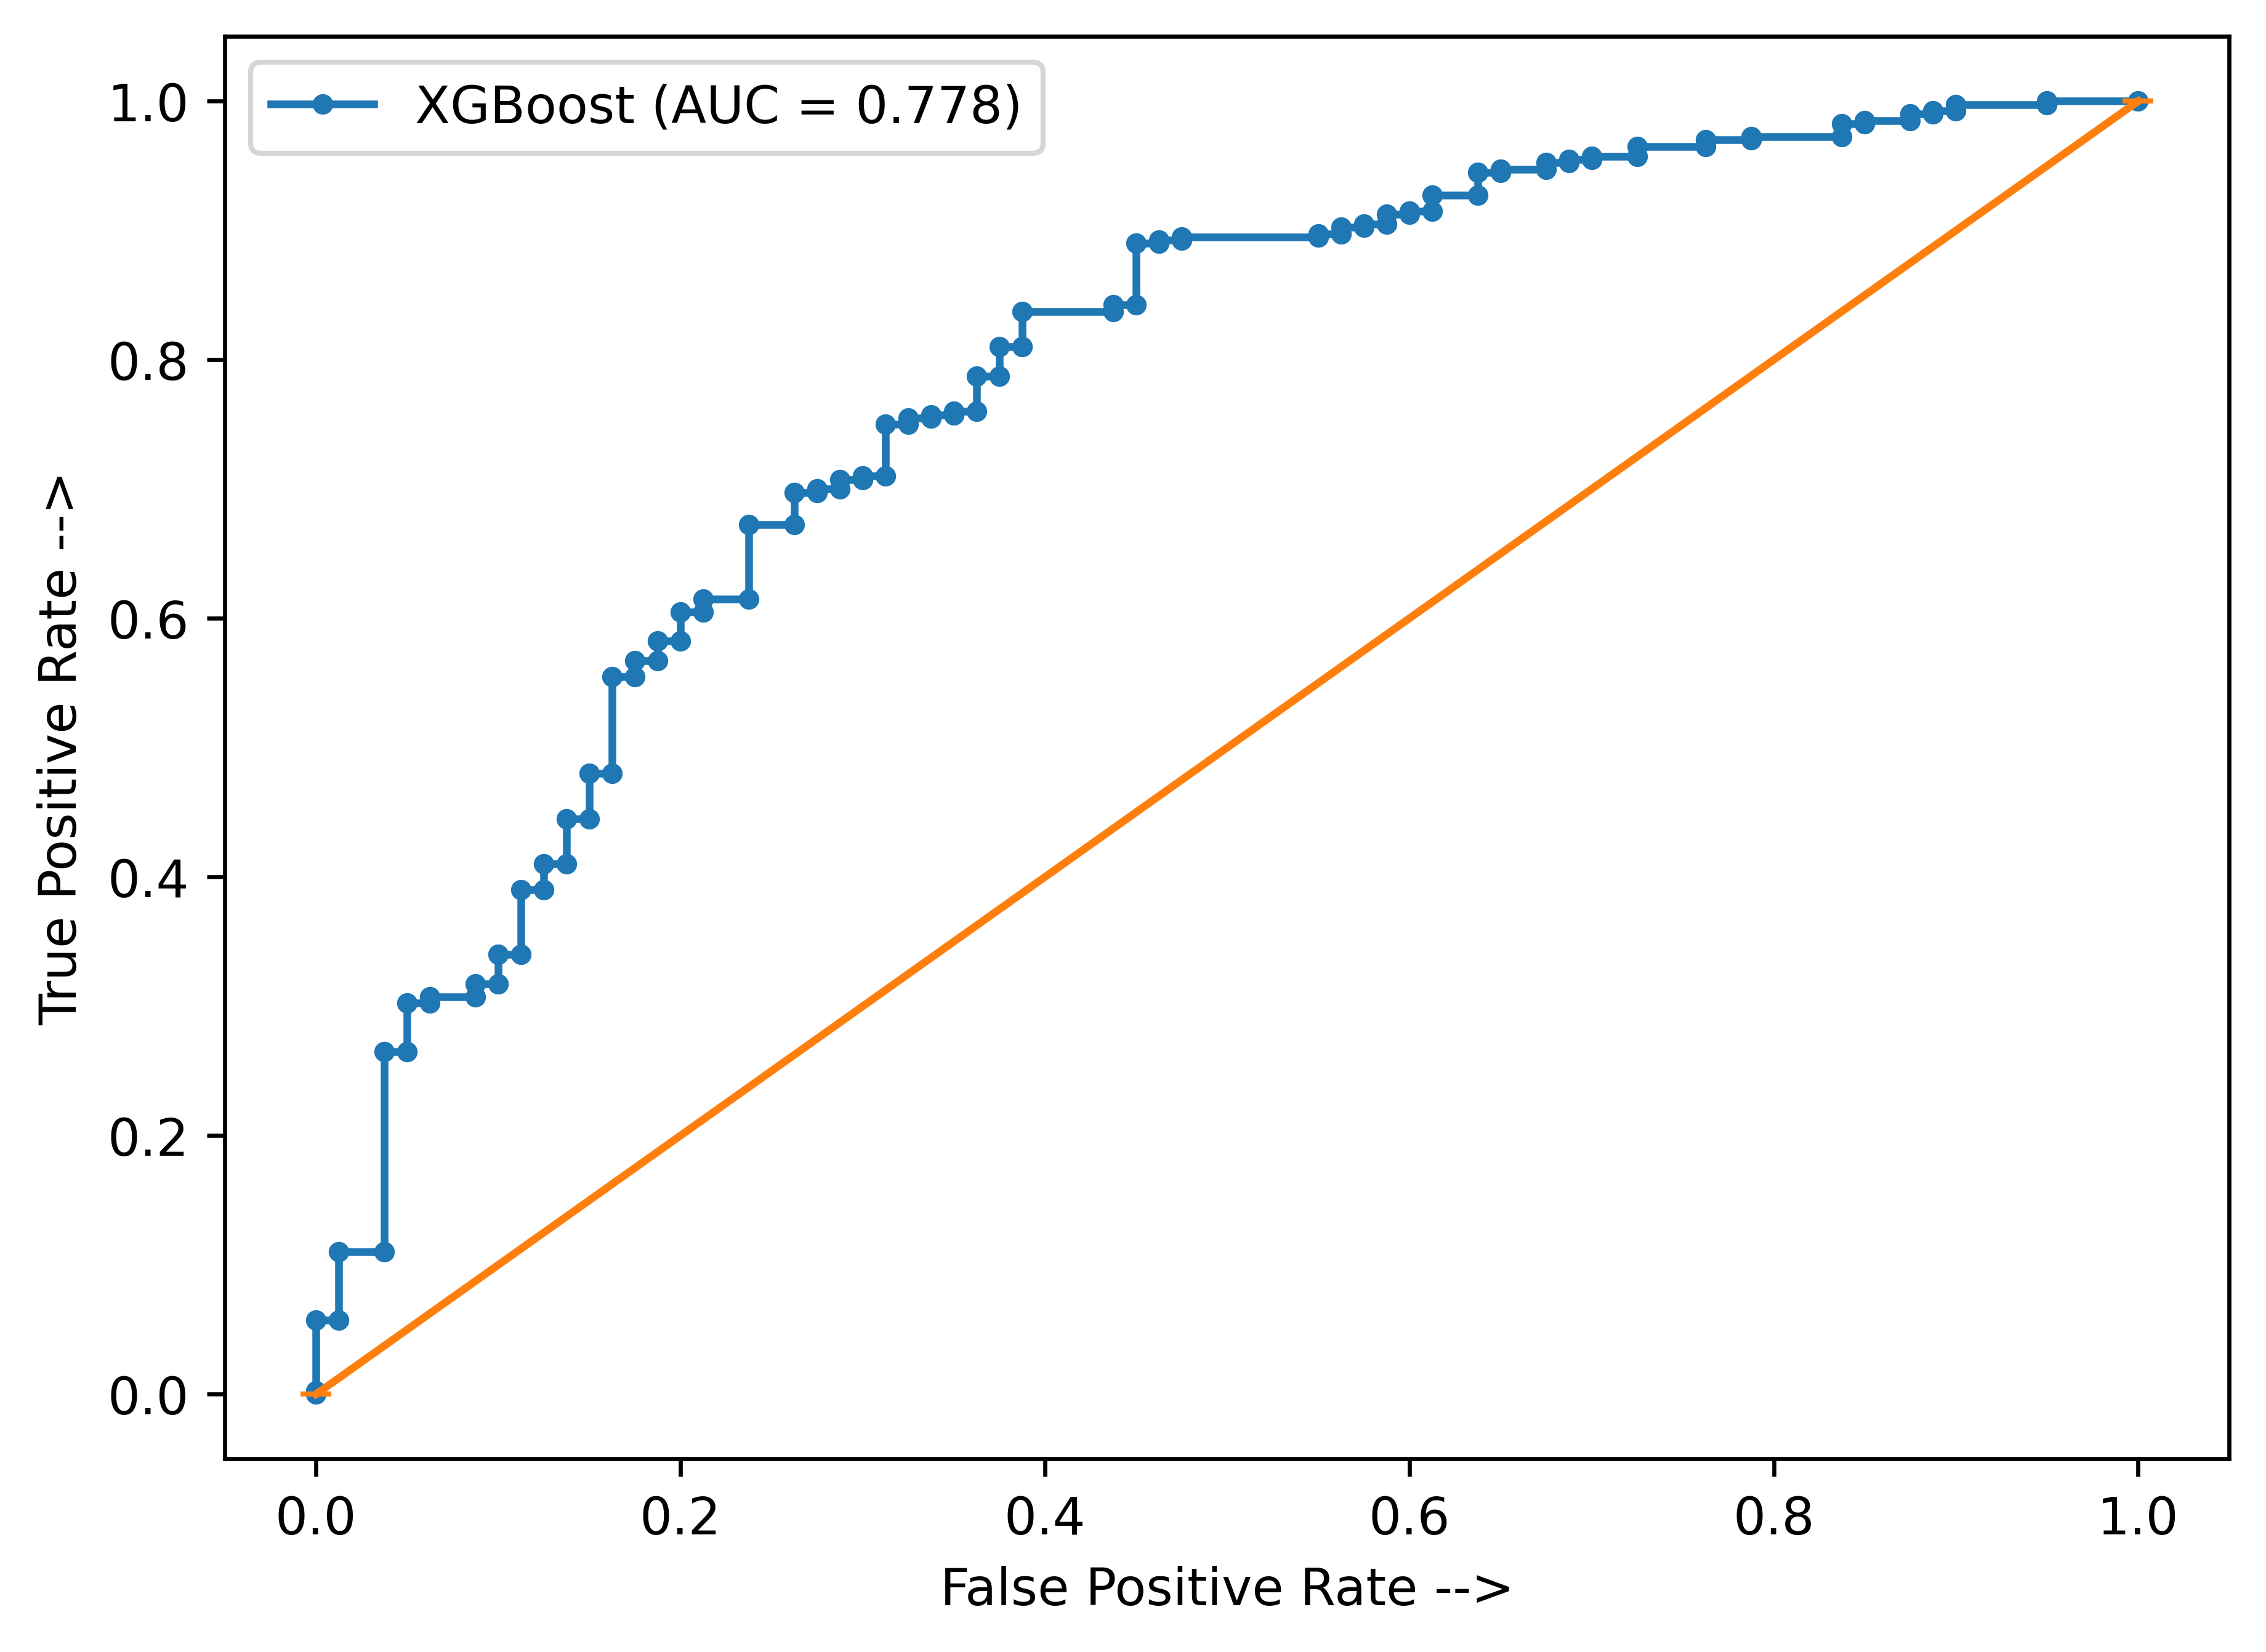

In [38]:
plt.figure(figsize=(7, 5), dpi=600)
plt.plot(fpr, tpr, marker='.', label='XGBoost (AUC = %0.3f)' % r_auc_score)
plt.plot(rfpr, rtpr, marker='_' % r_auc_score_1)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.savefig('XGB_AUC.png', dpi=600, bbox_inches='tight')
plt.show()

In [39]:
import shap
import matplotlib.pyplot as plt

def model_predict(x_train):
    return xgb.predict(x_train)

masker = shap.maskers.Independent(X_v_test_data)

explainer = shap.Explainer(model_predict, masker)

shap_values = explainer(X_v_test_data)

# Plot and save the SHAP summary plot
shap.summary_plot(shap_values, X_v_test_data, show=False)

# Save the plot to a file
plt.savefig('XGB_shap_summary_plot.png', dpi=300, bbox_inches='tight')
plt.close()

PermutationExplainer explainer: 481it [02:07,  3.54it/s]                                                               


In [40]:
# Convert SHAP values to a DataFrame
shap_values_df = pd.DataFrame(shap_values.values, columns=X_v_test_data.columns)

# Save the SHAP values DataFrame to a CSV file
shap_values_df.to_csv('XGB_shap_values.csv', index=False)